In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import seaborn as sns

# machine learning libary

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

# Pré-processamento

In [2]:
diabetes = pd.read_csv('../../datasets/raw/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
diabetes.columns = diabetes.columns.str.lower()

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diabetes_binary       70692 non-null  float64
 1   highbp                70692 non-null  float64
 2   highchol              70692 non-null  float64
 3   cholcheck             70692 non-null  float64
 4   bmi                   70692 non-null  float64
 5   smoker                70692 non-null  float64
 6   stroke                70692 non-null  float64
 7   heartdiseaseorattack  70692 non-null  float64
 8   physactivity          70692 non-null  float64
 9   fruits                70692 non-null  float64
 10  veggies               70692 non-null  float64
 11  hvyalcoholconsump     70692 non-null  float64
 12  anyhealthcare         70692 non-null  float64
 13  nodocbccost           70692 non-null  float64
 14  genhlth               70692 non-null  float64
 15  menthlth           

In [4]:
diabetes.isnull().sum()

diabetes_binary         0
highbp                  0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
stroke                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
anyhealthcare           0
nodocbccost             0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
sex                     0
age                     0
education               0
income                  0
dtype: int64

In [5]:
cols = diabetes.columns
for col in cols:
    diabetes[f'{col}'] = diabetes[f'{col}'].astype('int8')
del cols
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   diabetes_binary       70692 non-null  int8 
 1   highbp                70692 non-null  int8 
 2   highchol              70692 non-null  int8 
 3   cholcheck             70692 non-null  int8 
 4   bmi                   70692 non-null  int8 
 5   smoker                70692 non-null  int8 
 6   stroke                70692 non-null  int8 
 7   heartdiseaseorattack  70692 non-null  int8 
 8   physactivity          70692 non-null  int8 
 9   fruits                70692 non-null  int8 
 10  veggies               70692 non-null  int8 
 11  hvyalcoholconsump     70692 non-null  int8 
 12  anyhealthcare         70692 non-null  int8 
 13  nodocbccost           70692 non-null  int8 
 14  genhlth               70692 non-null  int8 
 15  menthlth              70692 non-null  int8 
 16  phys

In [6]:
#Salvando dados pré-processados

diabetes.to_pickle('../../datasets/processed/diabetes_processed.pkl')

# Modificando dados para melhor vizualização

In [7]:
diabetes.diabetes_binary[diabetes['diabetes_binary'] ==  0] = 'sem_diabetes'
diabetes.diabetes_binary[diabetes['diabetes_binary'] ==  1] = 'diabetes'
diabetes.highbp[diabetes['highbp'] ==  0] = 'pressao_normal'
diabetes.highbp[diabetes['highbp'] ==  1] = 'pressao_alta'
diabetes.highchol[diabetes['highchol'] ==  0] = 'colesterol_normal'
diabetes.highchol[diabetes['highchol'] ==  1] = 'colesterol_alto'
diabetes.smoker[diabetes['smoker'] ==  0] = 'não'
diabetes.smoker[diabetes['smoker'] ==  1] = 'sim'
diabetes.heartdiseaseorattack[diabetes['heartdiseaseorattack'] ==  0] = 'não'
diabetes.heartdiseaseorattack[diabetes['heartdiseaseorattack'] ==  1] = 'sim'
diabetes.stroke[diabetes['stroke'] ==  0] = 'não'
diabetes.stroke[diabetes['stroke'] ==  1] = 'sim'
diabetes.physactivity[diabetes['physactivity'] ==  0] = 'não'
diabetes.physactivity[diabetes['physactivity'] ==  1] = 'sim'
diabetes.fruits[diabetes['fruits'] ==  0] = 'não'
diabetes.fruits[diabetes['fruits'] ==  1] = 'sim'
diabetes.veggies[diabetes['veggies'] ==  0] = 'não'
diabetes.veggies[diabetes['veggies'] ==  1] = 'sim'
diabetes.hvyalcoholconsump[diabetes['hvyalcoholconsump'] ==  0] = 'não'
diabetes.hvyalcoholconsump[diabetes['hvyalcoholconsump'] ==  1] = 'sim'
diabetes.diffwalk[diabetes['diffwalk'] ==  0] = 'não'
diabetes.diffwalk[diabetes['diffwalk'] ==  1] = 'sim'
diabetes.anyhealthcare[diabetes['anyhealthcare'] ==  0] = 'não'
diabetes.anyhealthcare[diabetes['anyhealthcare'] ==  1] = 'sim'
diabetes.nodocbccost[diabetes['nodocbccost'] ==  0] = 'não'
diabetes.nodocbccost[diabetes['nodocbccost'] ==  1] = 'sim'
diabetes.genhlth[diabetes['genhlth'] == 1] = 'excelente'
diabetes.genhlth[diabetes['genhlth'] == 2] = 'muito_bom'
diabetes.genhlth[diabetes['genhlth'] == 3] = 'bom'
diabetes.genhlth[diabetes['genhlth'] == 4] = 'justo'
diabetes.genhlth[diabetes['genhlth'] == 5] = 'pobre'
diabetes.education[diabetes['education'] == 1] = 'nunca_frequentou'
diabetes.education[diabetes['education'] == 2] = 'elementar'
diabetes.education[diabetes['education'] == 3] = 'secundaria'
diabetes.education[diabetes['education'] == 4] = 'ensino_medio'
diabetes.education[diabetes['education'] == 5] = 'graduando_ou_técnico'
diabetes.education[diabetes['education'] == 6] = 'graduado'
diabetes.income[diabetes['income'] == 1] = '<10,000'
diabetes.income[diabetes['income'] == 2] = '<$10,000'
diabetes.income[diabetes['income'] == 3] = '<$10,000'
diabetes.income[diabetes['income'] == 4] = '<$10,000'
diabetes.income[diabetes['income'] == 5] = '<$35,000'
diabetes.income[diabetes['income'] == 6] = '<$35,000'
diabetes.income[diabetes['income'] == 7] = '<$35,000'
diabetes.income[diabetes['income'] == 8] = '$75,000=>'
diabetes.cholcheck[diabetes['cholcheck'] == 0] = 'Sem_checagem_em_5_anos'
diabetes.cholcheck[diabetes['cholcheck'] == 1] = 'com_checagem_em_5_anos'
diabetes.sex[diabetes['sex'] ==  0] = 'feminino'
diabetes.sex[diabetes['sex'] ==  1] = 'masculino'

C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\1306131105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.highbp[diabetes['highbp'] ==  0] = 'pressao_normal'
C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\1306131105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.highchol[diabetes['highchol'] ==  0] = 'colesterol_normal'
C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\1306131105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [8]:
#Salvando dados de visualização

diabetes.to_pickle('../../datasets/processed/diabetes_visual.pkl')

In [9]:
diabetes_bp = diabetes.groupby(['diabetes_binary', 'highbp']).size().reset_index(name = 'count')
diabetes_chol = diabetes.groupby(['diabetes_binary', 'highchol']).size().reset_index(name = 'count')
diabetes_smoker = diabetes.groupby(['diabetes_binary', 'smoker']).size().reset_index(name = 'count')
diabetes_heart = diabetes.groupby(['diabetes_binary', 'heartdiseaseorattack']).size().reset_index(name = 'count')
diabetes_stroke = diabetes.groupby(['diabetes_binary', 'stroke']).size().reset_index(name = 'count')
diabetes_physactivity = diabetes.groupby(['diabetes_binary', 'physactivity']).size().reset_index(name = 'count')
diabetes_fruits = diabetes.groupby(['diabetes_binary', 'fruits']).size().reset_index(name = 'count')
diabetes_veggies = diabetes.groupby(['diabetes_binary', 'veggies']).size().reset_index(name = 'count')
diabetes_hvyalcoholconsump = diabetes.groupby(['diabetes_binary', 'hvyalcoholconsump']).size().reset_index(name = 'count')
diabetes_diffwalk = diabetes.groupby(['diabetes_binary', 'diffwalk']).size().reset_index(name = 'count')
diabetes_anyhealthcare = diabetes.groupby(['diabetes_binary', 'anyhealthcare']).size().reset_index(name = 'count')
diabetes_nodocbccost = diabetes.groupby(['diabetes_binary', 'nodocbccost']).size().reset_index(name = 'count')
diabetes_geral = diabetes.groupby(['diabetes_binary', 'genhlth']).size().reset_index(name = 'count')
diabetes_sex = diabetes.groupby(['diabetes_binary', 'sex']).size().reset_index(name = 'count')
diabetes_education = diabetes.groupby(['diabetes_binary', 'education']).size().reset_index(name = 'count')
diabetes_income = diabetes.groupby(['diabetes_binary', 'income']).size().reset_index(name = 'count')
diabetes_cholcheck = diabetes.groupby(['diabetes_binary', 'cholcheck']).size().reset_index(name = 'count')

# Análise gerais

C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\2259005286.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


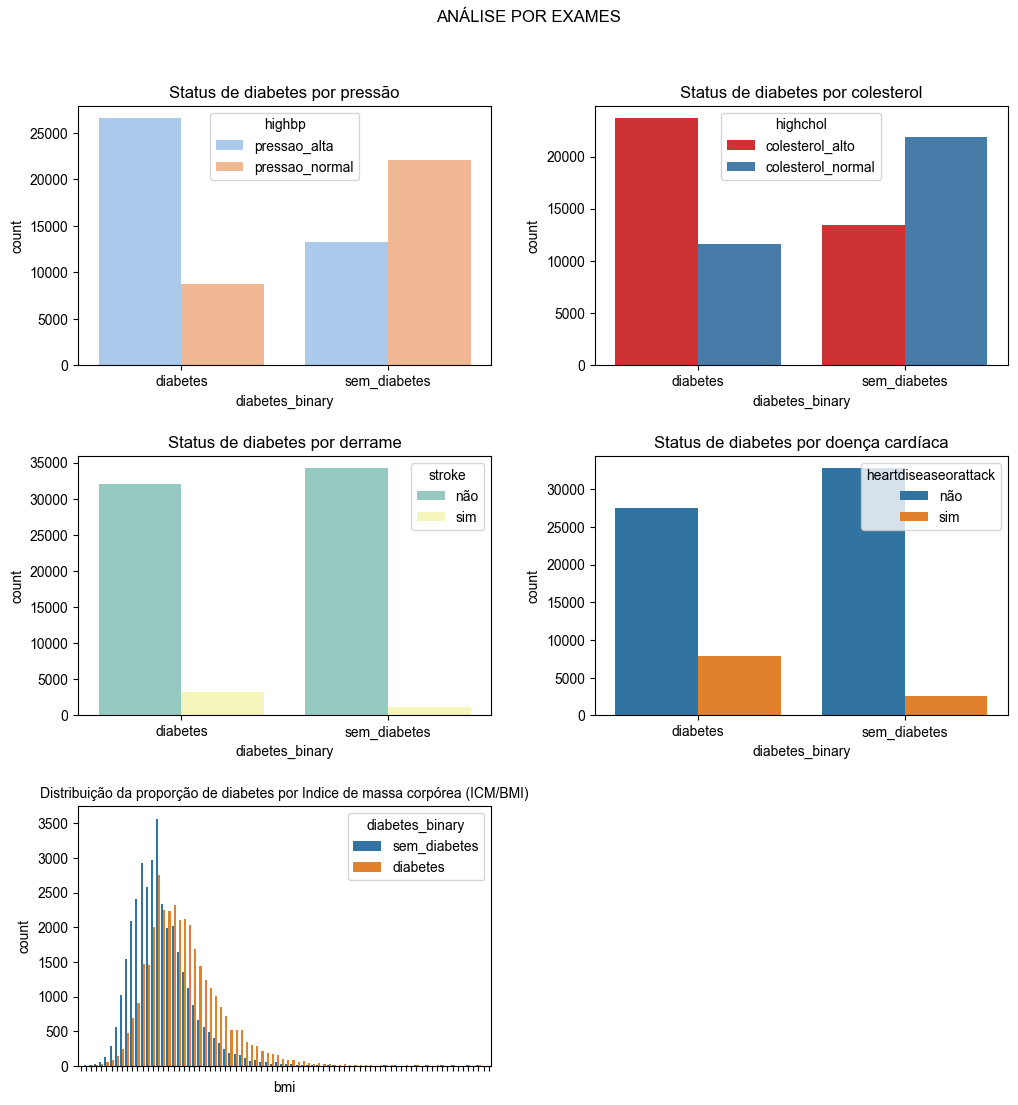

In [10]:
fig = plt.subplots(figsize = (12, 12))
plt.suptitle('ANÁLISE POR EXAMES')

plt.subplot(3, 2, 1)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'highbp', data = diabetes_bp, palette = 'pastel')
plt.title('Status de diabetes por pressão')
#plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\projeto_final\main\outputs\imgs\gerais\status_de_diabetes_por_pressao.png')

plt.subplot(3, 2, 2)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'highchol', data = diabetes_chol, palette = 'Set1')
plt.title('Status de diabetes por colesterol')
#plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\projeto_final\main\outputs\imgs\gerais\status_de_diabetes_por_colesterol.png')

plt.subplot(3, 2, 3)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'stroke', data = diabetes_stroke, palette = 'Set3')
plt.title('Status de diabetes por derrame')
#plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\projeto_final\main\outputs\imgs\gerais\status_de_diabetes_por_derrame.png')

plt.subplot(3, 2, 4)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'heartdiseaseorattack', data = diabetes_heart)
plt.title('Status de diabetes por doença cardíaca')
#plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\projeto_final\main\outputs\imgs\gerais\status_de_diabetes_por_doenca_cardiaca.png')

plt.subplot(3, 2, 5)
a = sns.countplot(x='bmi', hue='diabetes_binary', data=diabetes);
a.set_title( f"Distribuição da proporção de diabetes por Indice de massa corpórea (ICM/BMI)" , size = 10 )
a.set_xticklabels([])
sns.set(rc={'figure.figsize':(12,6)})
#plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\projeto_final\main\outputs\imgs\gerais\status_de_diabetes_por_imc.png')

plt.subplots_adjust(
    left = 0.125,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0.25,
    hspace = 0.35
)
plt.savefig('../../outputs/imgs/analise_por_exames.png')
plt.show()

Notamos que quem tem diabetes tem tendência a ter pressão e colesterol alto, o que indica uma saúde ruim. O que justifica a alta probabilidade de derrame e doença cardíaca, mesmo que o número de respondentes que não possuem diabetes e nem doença cardíaca seja maior.
Além disso, também notamos que a diabetes está relacionada a uma maior massa corpórea.

C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\1319704207.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


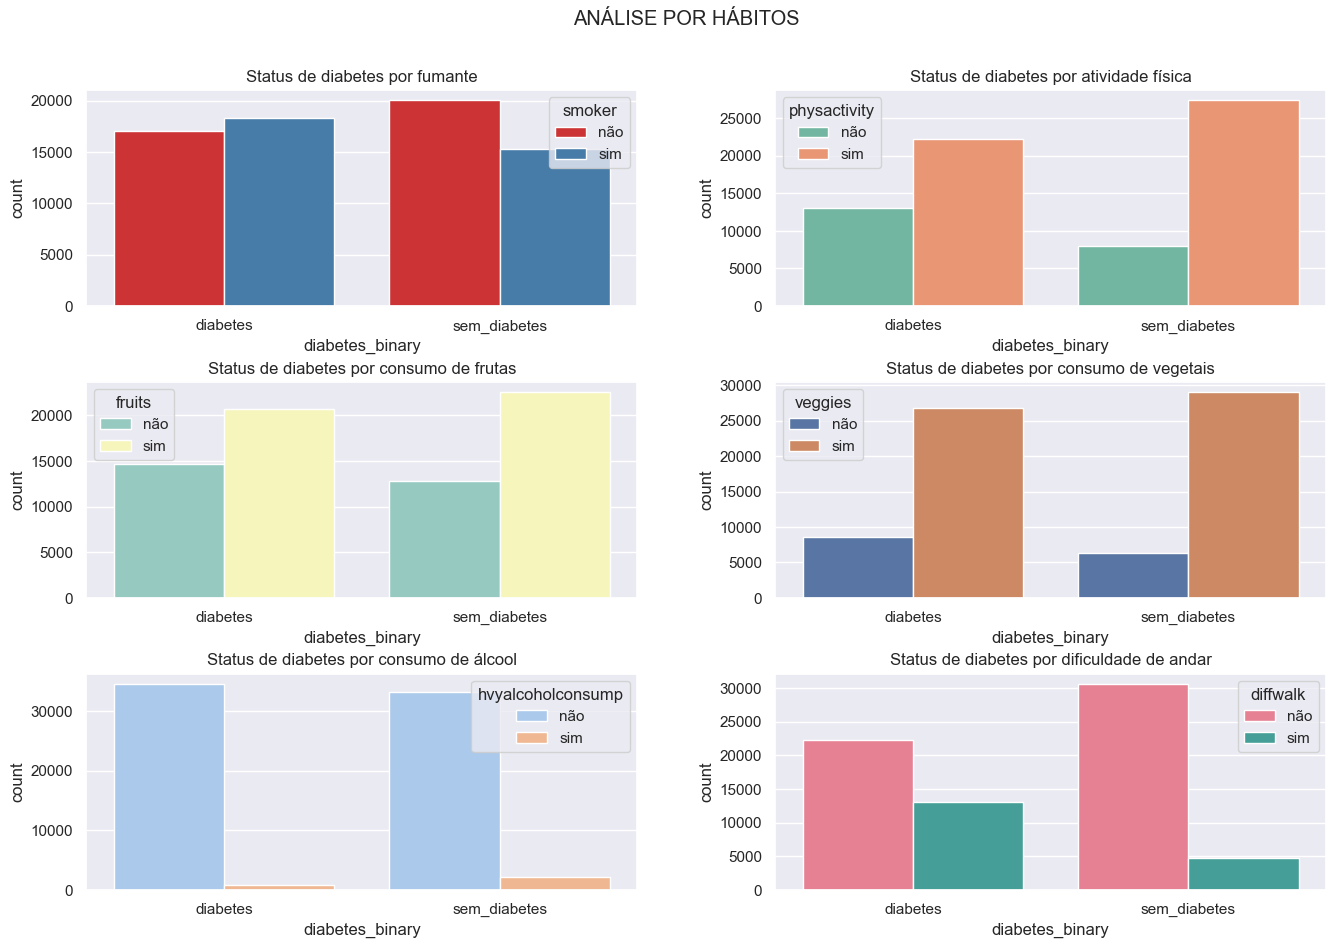

In [11]:
fig = plt.subplots(figsize = (16, 10))
plt.suptitle('ANÁLISE POR HÁBITOS')

plt.subplot(3, 2, 1)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'smoker', data = diabetes_smoker, palette = 'Set1')
plt.title('Status de diabetes por fumante')

plt.subplot(3, 2, 2)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'physactivity', data = diabetes_physactivity, palette = 'Set2')
plt.title('Status de diabetes por atividade física')

plt.subplot(3, 2, 3)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'fruits', data = diabetes_fruits, palette = 'Set3')
plt.title('Status de diabetes por consumo de frutas')

plt.subplot(3, 2, 4)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'veggies', data = diabetes_veggies)
plt.title('Status de diabetes por consumo de vegetais')

plt.subplot(3, 2, 5)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'hvyalcoholconsump', data = diabetes_hvyalcoholconsump, palette = 'pastel')
plt.title('Status de diabetes por consumo de álcool')

plt.subplot(3, 2, 6)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'diffwalk', data = diabetes_diffwalk, palette = 'husl')
plt.title('Status de diabetes por dificuldade de andar')

plt.subplots_adjust(
    left = 0.125,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0.25,
    hspace = 0.35
)
plt.savefig('../../outputs/imgs/analise_por_habitos.png')
plt.show()

Vemos um equilíbrio entre fumantes e não fumantes com relação ao diagnóstico de diabetes. apesar de os respondentes em grande maioria manterem hábitos saudáveis com relação à alimentação, atividade física e consumo de álcool.

C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\1722218058.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


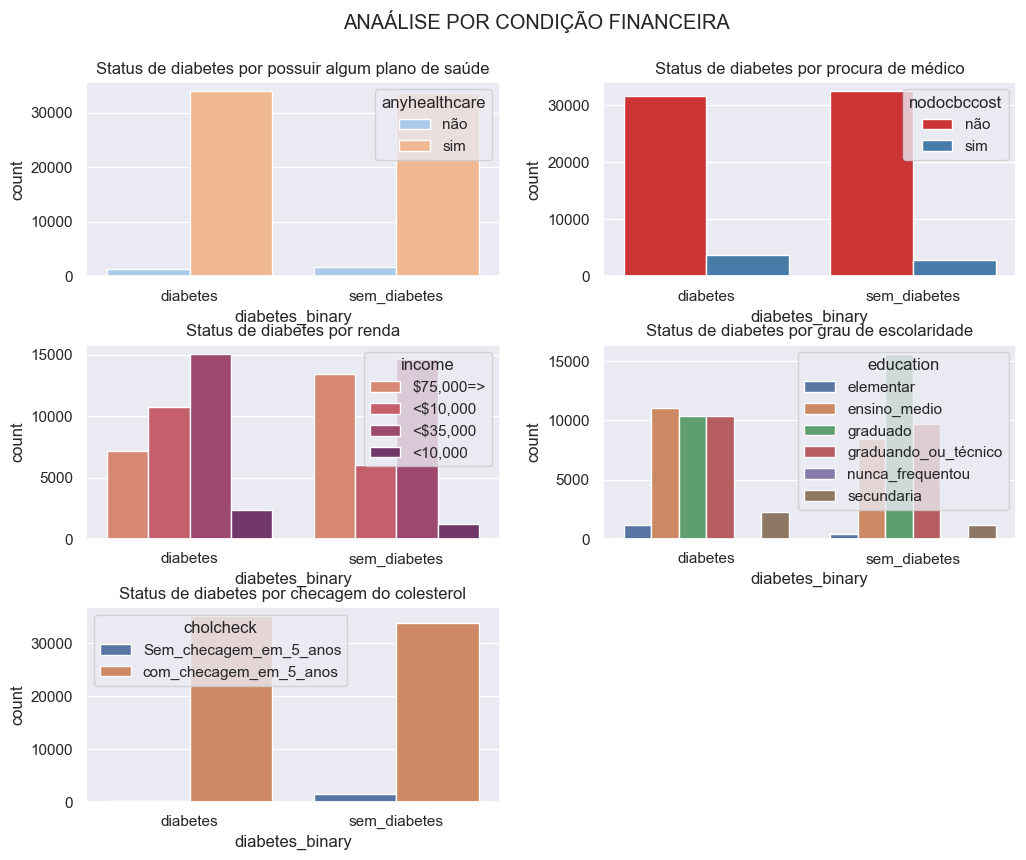

In [12]:
fig = plt.subplots(figsize = (12, 9))
plt.suptitle('ANAÁLISE POR CONDIÇÃO FINANCEIRA')

plt.subplot(3, 2, 1)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'anyhealthcare', data = diabetes_anyhealthcare, palette = 'pastel')
plt.title('Status de diabetes por possuir algum plano de saúde')

plt.subplot(3, 2, 2)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'nodocbccost', data = diabetes_nodocbccost, palette = 'Set1')
plt.title('Status de diabetes por procura de médico')

plt.subplot(3, 2, 3)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'income', data = diabetes_income, palette = 'flare')
plt.title('Status de diabetes por renda')

plt.subplot(3, 2, 4)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'education', data = diabetes_education)
plt.title('Status de diabetes por grau de escolaridade')

plt.subplot(3, 2, 5)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'cholcheck', data = diabetes_cholcheck)
plt.title('Status de diabetes por checagem do colesterol')

plt.subplots_adjust(
    left = 0.125,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0.25,
    hspace = 0.35
)
plt.savefig('../../outputs/imgs/analise_por_condicao_financeira.png')
plt.show()

A maioria dos respondentes possui renda e grau de escolaridade intermediário, o que os permite manter alguma espécie de plano de saúde para cuidar da saúde.

C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\923235237.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


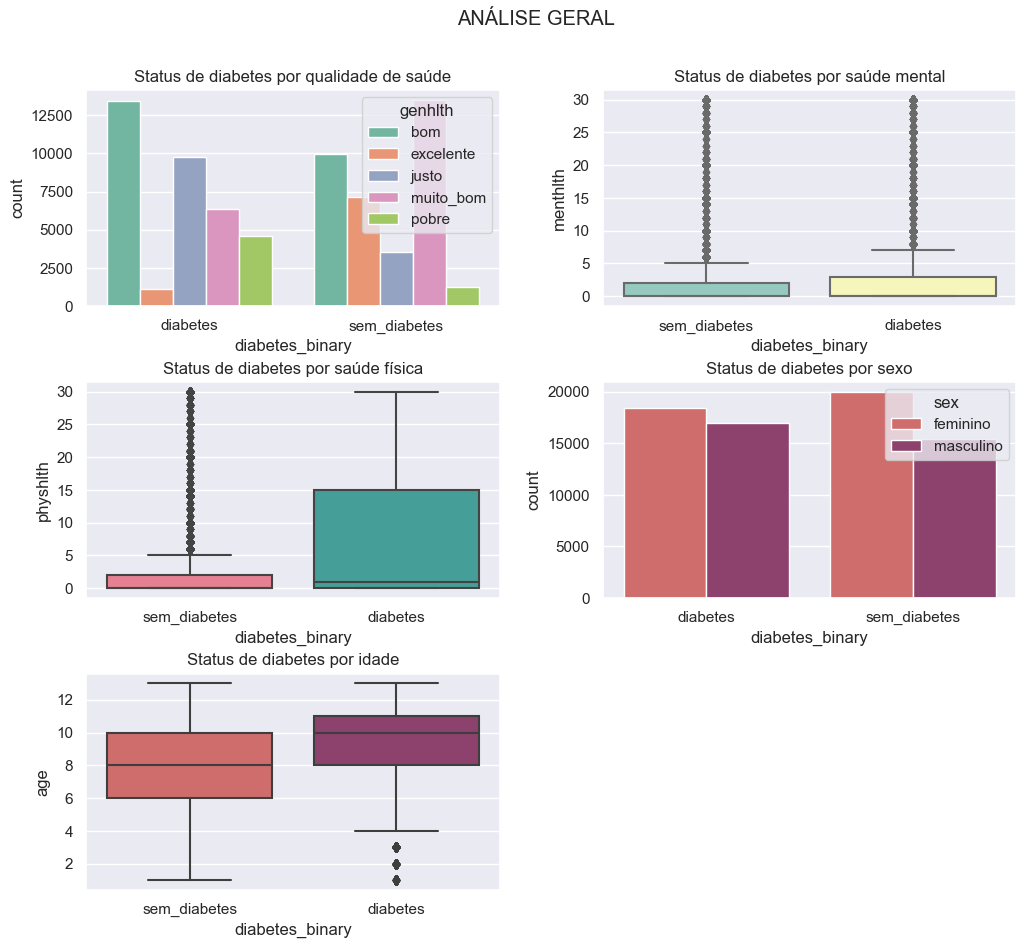

In [13]:
fig = plt.subplots(figsize = (12, 10))
plt.suptitle('ANÁLISE GERAL')

plt.subplot(3, 2, 1)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'genhlth', data = diabetes_geral, palette = 'Set2')
plt.title('Status de diabetes por qualidade de saúde')

plt.subplot(3, 2, 2)
sns.boxplot(x = 'diabetes_binary', y = 'menthlth', data = diabetes, palette = 'Set3')
plt.title('Status de diabetes por saúde mental')

plt.subplot(3, 2, 3)
sns.boxplot(x = 'diabetes_binary', y = 'physhlth', data = diabetes, palette = 'husl')
plt.title('Status de diabetes por saúde física')

plt.subplot(3, 2, 4)
sns.barplot(x = 'diabetes_binary', y = 'count', hue = 'sex', data = diabetes_sex, palette = 'flare')
plt.title('Status de diabetes por sexo')

plt.subplot(3, 2, 5)
sns.boxplot(x = 'diabetes_binary', y = 'age', data = diabetes, palette = 'flare')
plt.title('Status de diabetes por idade')

plt.subplots_adjust(
    left = 0.125,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0.25,
    hspace = 0.35
)
plt.savefig('../../outputs/imgs/analise_geral.png')
plt.show()

Temos um equilíbrio de diagnóstico de diabetes com relação à sexo dos respondentes. Porém, o diagnóstico de diabetes é mais comum em idades avançadas, o que justifica o maior desgaste físico e e qualidade de vida não tão boa.

# Análise pontuais

Text(0.5, 1.0, 'Número de diabéticos e não diabético por IMC')

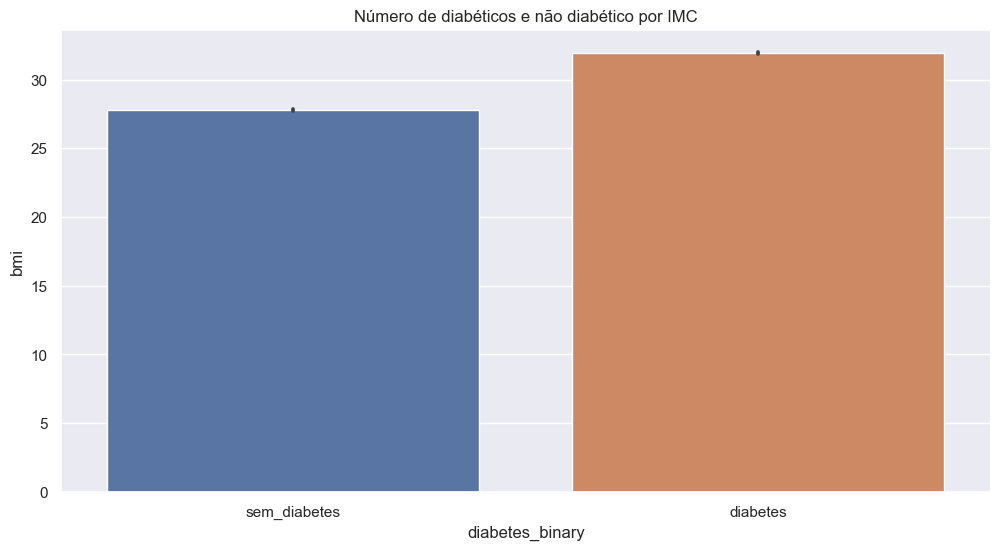

In [14]:
figsize = (8, 4)

sns.barplot(x = 'diabetes_binary', y = 'bmi', data = diabetes)
plt.title('Número de diabéticos e não diabético por IMC')

In [15]:
baixo = diabetes[diabetes['bmi'] < 18.5]['diabetes_binary'].value_counts().reset_index(name = 'count')
alto = diabetes[diabetes['bmi'] > 26]['diabetes_binary'].value_counts().reset_index(name = 'count')
print(baixo)
print()
print(alto)

          index  count
0  sem_diabetes    484
1      diabetes    169

          index  count
0      diabetes  27796
1  sem_diabetes  18777


Text(0.5, 1.0, 'Porcentagem por diabetes e sexo')

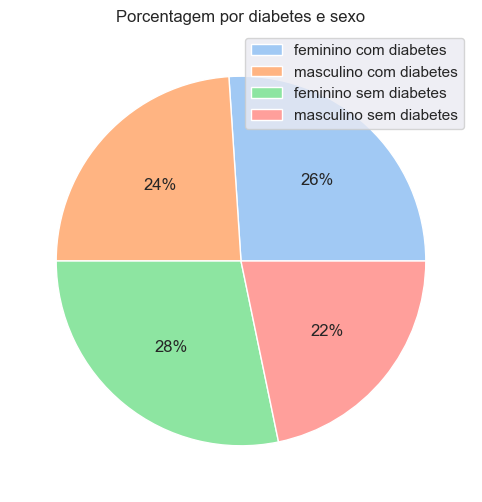

In [16]:
sex = (diabetes.groupby(['diabetes_binary'])['sex'].value_counts() / diabetes.groupby(['diabetes_binary'])['sex'].count() * 100).reset_index(name = 'percent')
sex['labels'] = ['feminino com diabetes', 'masculino com diabetes', 'feminino sem diabetes', 'masculino sem diabetes']

figsize = (12, 8)
plt.pie(x = sex.percent, labels = sex.labels, colors = sns.color_palette('pastel'), autopct = '%.0f%%', labeldistance = None)
plt.legend()
plt.title('Porcentagem por diabetes e sexo')

O diagnóstico de diabetes não é influenciado pelo sexo.

In [17]:
age = (diabetes.groupby(['diabetes_binary'])['age'].value_counts() / diabetes.groupby(['diabetes_binary'])['age'].count() * 50).reset_index(name = 'percent')

aux = [ ]
df = age[(age['age'] > 8) & (age['diabetes_binary'] == 'sem_diabetes')]
aux.append(df['percent'].sum())
df = age[(age['age'] > 8) & (age['diabetes_binary'] == 'diabetes')]
aux.append(df['percent'].sum())
percent = pd.DataFrame(aux)
percent = percent.rename(columns = {0: 'idosos'})
del df, aux

aux = []
df = age[(age['age'] <= 8) & (age['diabetes_binary'] == 'sem_diabetes')]
aux.append(df['percent'].sum())
df = age[(age['age'] <= 8) & (age['diabetes_binary'] == 'diabetes')]
aux.append(df['percent'].sum())
demais = pd.DataFrame(aux)
demais = demais.rename(columns = {0: 'demais'})
del df, aux

percent['demais'] = demais
del demais

percent['diabetes'] = ['Não', 'Sim']

C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\1094682308.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


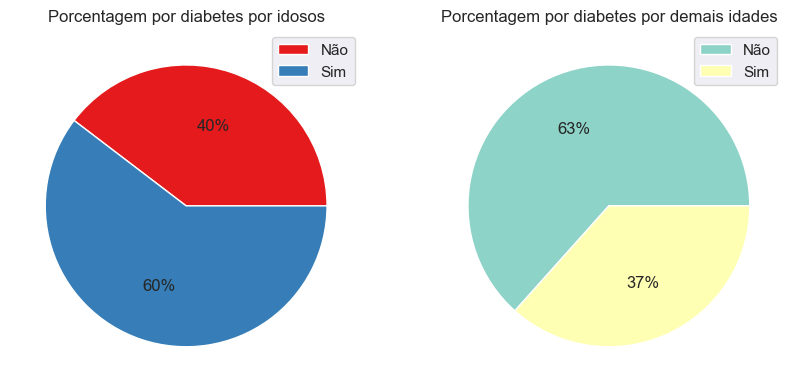

In [18]:
fig = plt.subplots(figsize = (10, 6))

plt.subplot(1, 2, 1)
plt.pie(x = percent.idosos, labels = percent.diabetes, colors = sns.color_palette('Set1'), autopct = '%.0f%%', labeldistance = None)
plt.legend()
plt.title('Porcentagem por diabetes por idosos')

plt.subplot(1, 2, 2)
plt.pie(x = percent.demais, labels = percent.diabetes, colors = sns.color_palette('Set3'), autopct = '%.0f%%', labeldistance = None)
plt.legend()
plt.title('Porcentagem por diabetes por demais idades')

plt.show()

In [19]:
aux = open('../../datasets/processed/diabetes_processed.pkl', 'rb')
df = pickle.load(aux)

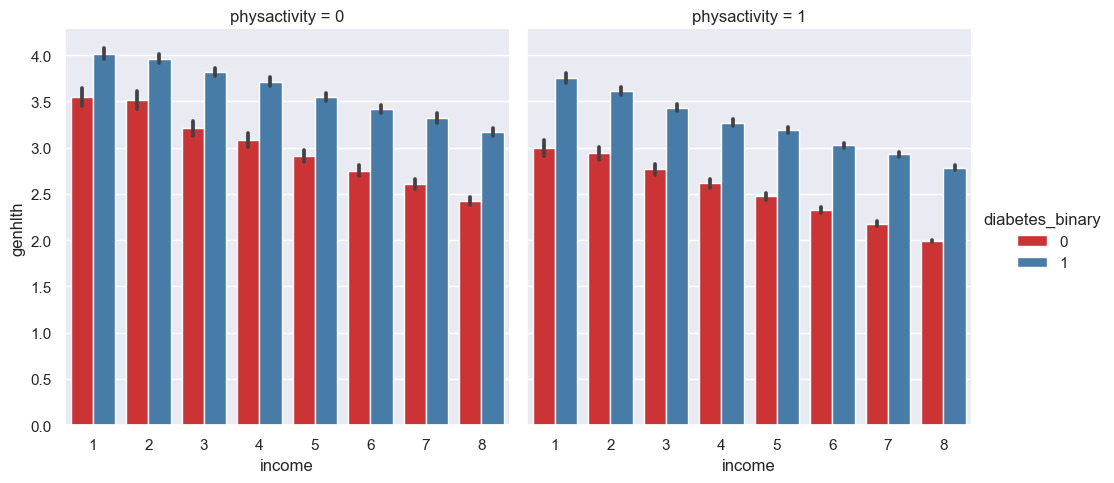

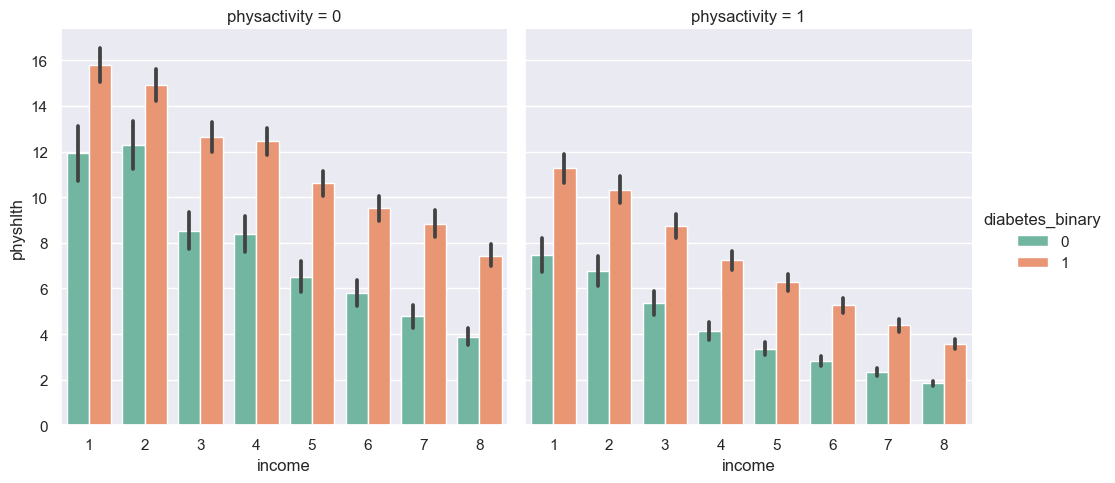

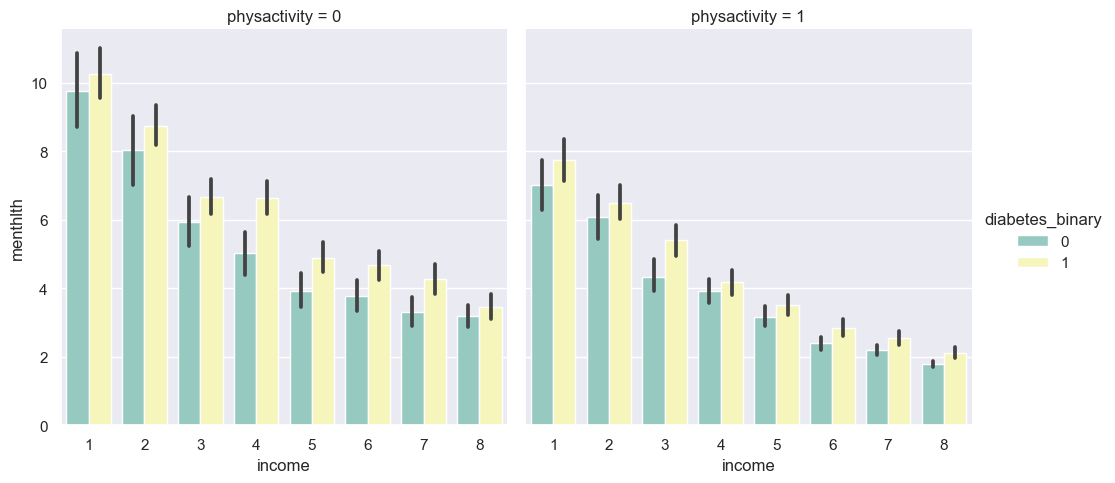

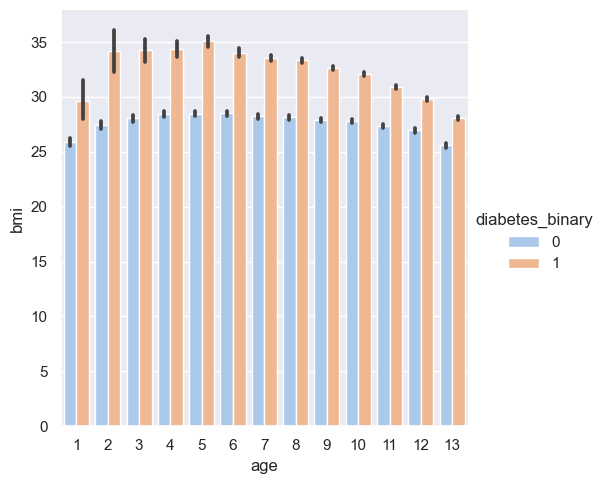

In [20]:
sns.catplot(x = 'income', y = 'genhlth', data = df, hue = 'diabetes_binary', col = 'physactivity', kind = 'bar', palette = 'Set1')

sns.catplot(x = 'income', y = 'physhlth', data = df, hue = 'diabetes_binary', col = 'physactivity', kind = 'bar', palette = 'Set2')

sns.catplot(x = 'income', y = 'menthlth', data = df, hue = 'diabetes_binary', col = 'physactivity', kind = 'bar', palette = 'Set3')

sns.catplot(x = 'age', y = 'bmi', data = df, hue = 'diabetes_binary', kind = 'bar', palette = 'pastel')

plt.show()

In [21]:
analise = df[df['diabetes_binary'] == 1][['genhlth', 'menthlth', 'physhlth', 'age', 'income', 'bmi']].agg(['min', 'max', 'mean', 'std', 'var'])
analise.to_csv(r'../../outputs/planilhas/genhlth_menthlth_physhlth_age_income_bmi.csv')

In [22]:
analise

,genhlth,menthlth,physhlth,age,income,bmi
min,1.000000,0.000000,0.000000,1.000000,1.000000,13.000000
max,5.000000,30.000000,30.000000,13.000000,8.000000,98.000000
mean,3.290981,4.461806,7.954479,9.379053,5.210094,31.944011
std,1.009928,8.947717,11.301491,2.330273,2.217319,7.363401
var,1.019954,80.061648,127.723688,5.430173,4.916504,54.219669


In [23]:
df.groupby(['education', 'physactivity'])['diabetes_binary'].value_counts()

education  physactivity  diabetes_binary
1          0             1                     20
                         0                     17
           1             1                     27
                         0                     11
2          0             1                    571
                         0                    177
           1             1                    612
                         0                    287
3          0             1                   1138
                         0                    460
           1             1                   1158
                         0                    691
4          0             1                   4715
                         0                   2740
           1             1                   6351
                         0                   5667
5          0             1                   3766
                         0                   2330
           1             0                   7346
         

In [24]:
x = diabetes[(diabetes['diabetes_binary'] == 'diabetes') & (diabetes['highbp'] == 'pressao_alta')]
risco = []
risco.append((len(x) * 100)/len(diabetes))
risco.append(100 - ((len(x) * 100)/len(diabetes)))
risco = pd.DataFrame(risco)
risco = risco.rename(index = {0: 'diabetes_highbp'})
risco = risco.rename(index = {1: 'demais'})
risco = risco.rename(columns = {0: 'percent'})
risco['index'] = risco.index

Text(0.5, 1.0, 'Porcentagem por diabetes por grupo de risco')

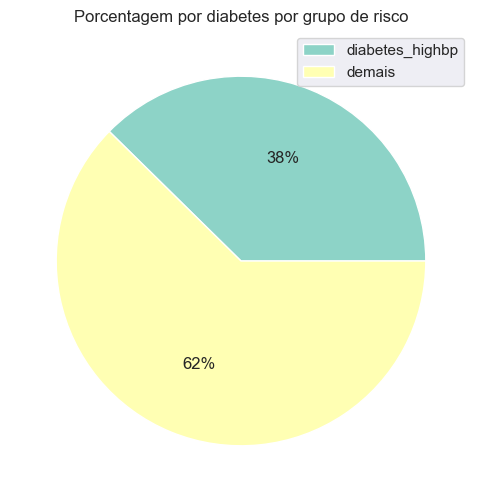

In [25]:
plt.pie(x = risco.percent, labels = risco.index, colors = sns.color_palette('Set3'), autopct = '%.0f%%', labeldistance = None)
plt.legend()
plt.title('Porcentagem por diabetes por grupo de risco')

In [26]:
df.describe()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [27]:
corr = df.corr()
corr

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
highbp,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
highchol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
cholcheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
bmi,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
heartdiseaseorattack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
physactivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


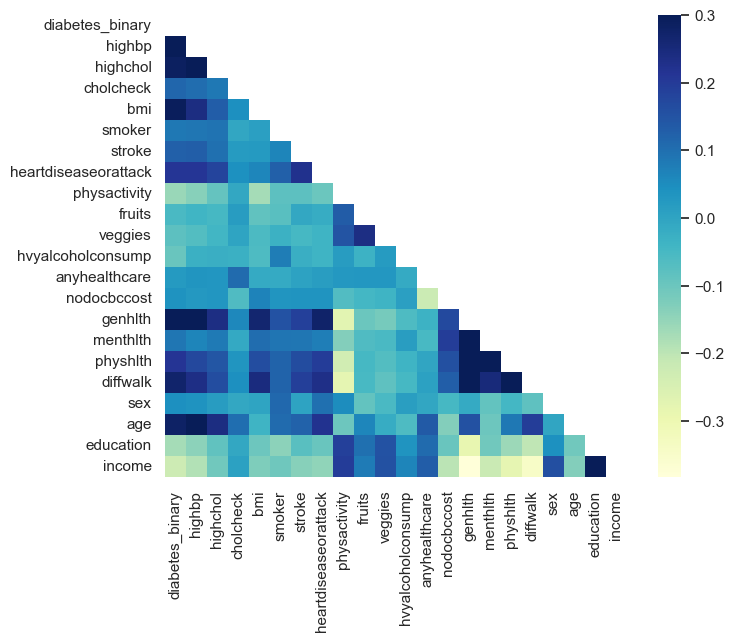

In [28]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (8, 6))
    ax = sns.heatmap(corr, mask = mask, vmax = .3, square = True, cmap = "YlGnBu")

Os grupos tende a ter uma correlação positiva entre sí e negativa com o outro grupo.

(22.5, -0.5)

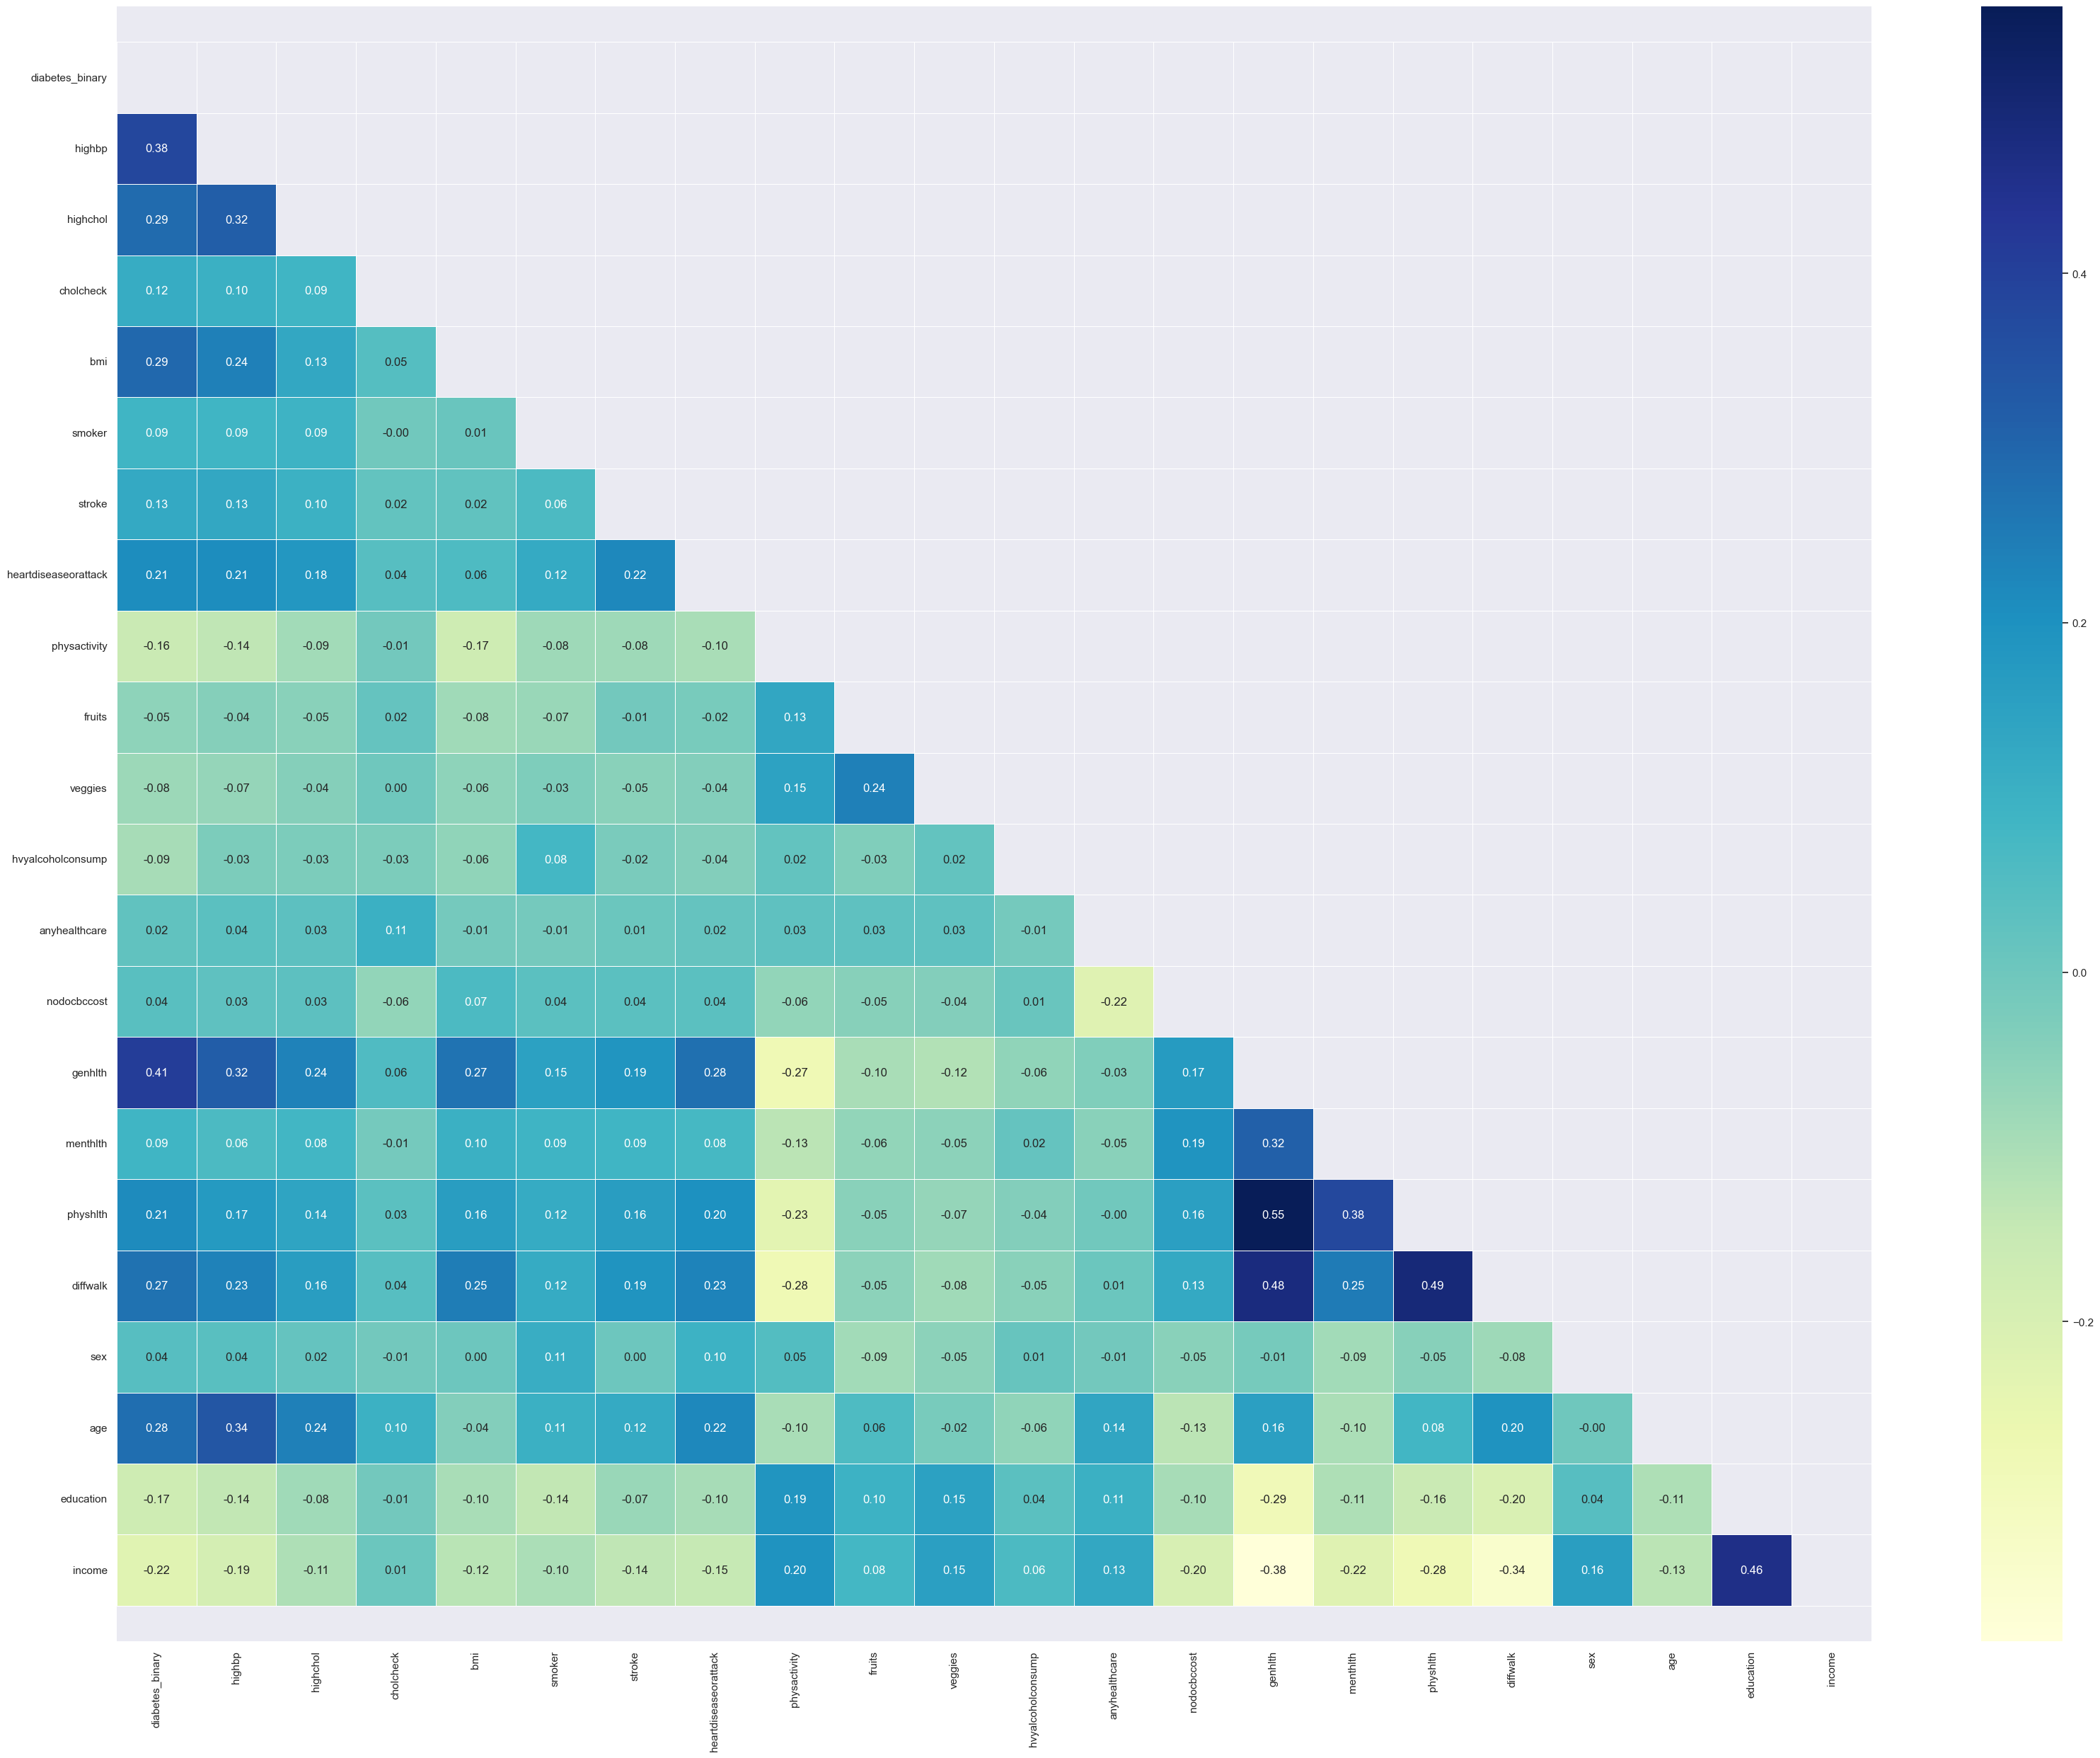

In [29]:
f, ax = plt.subplots(figsize = (40, 30))
ax = sns.heatmap(corr, annot = True, linewidths = 0.5, mask = mask, fmt = ".2f", cmap = "YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top = -0.5)

<AxesSubplot: title={'center': 'Correlação com o marcador'}>

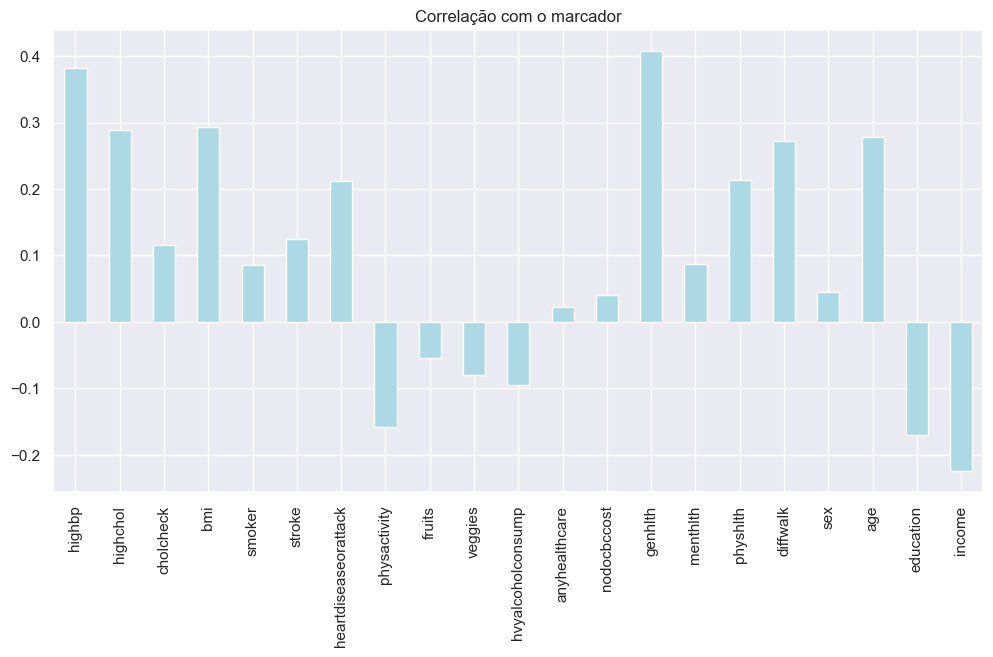

In [30]:
df.drop('diabetes_binary', axis = 1).corrwith(df.diabetes_binary).plot(
    kind = 'bar',
    title = "Correlação com o marcador",
    color = "lightblue")

Para as correlações negativas temos: PhysActivity, Fruits, Veggies, HvyAlcoholConsump, education e income.

Para as 3 primeiras variáveis temos essa corelação pois estão relacionadas a formas de evitar a diabetes.

Para o caso consumo de álcool temos uma correlação negativa pois pessoas não saudáveis tem menos propensão a consumir álcool.

Demais variáveis, com excessão de sexo e idade, tem correlaçõa positiva, pois estão relacionadas com grupo de risco.

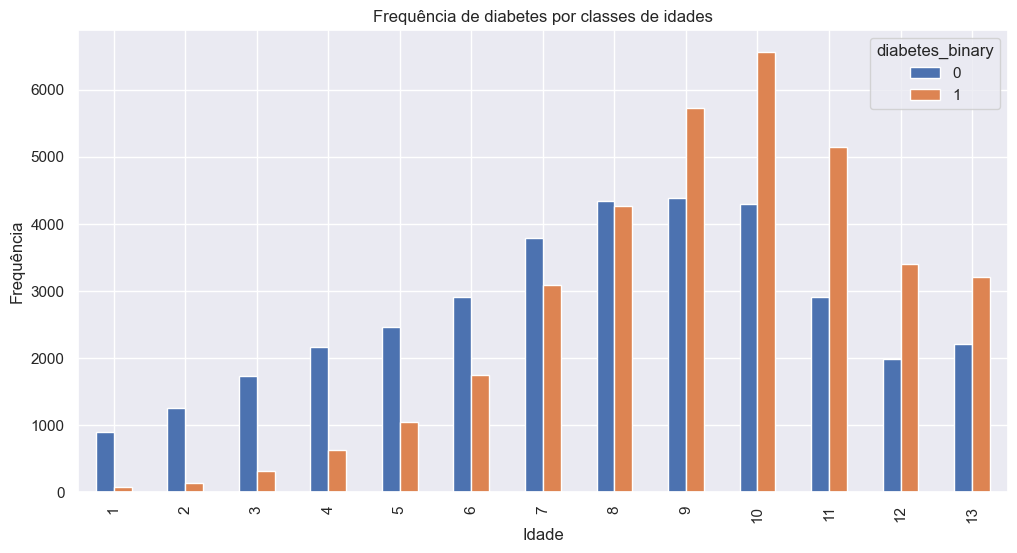

In [31]:
pd.crosstab(df.age, df.diabetes_binary).plot(kind = 'bar')
plt.title('Frequência de diabetes por classes de idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Machine Learn

In [33]:
x = df.drop('diabetes_binary', axis = 1) #Features
y = df[['diabetes_binary']] #Labels

# Dividindo as features e labels em train e test com test tamanho = 30% e train tamanho = 70%
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state = 10)

In [34]:
#define como transforma cada coluna para poder rodar no modelo de ML
numeric_features = ['bmi', 'genhlth', 'menthlth', 'age', 'education', 'income', 'physhlth']
numeric_transformer = SimpleImputer(strategy="median")

#Exemplo de transformar a coluna não numerica com ordem para intervalo valores.
ordinal_features = [] #não acho que é ordinal
ordinal_transformer = OrdinalEncoder()

#Exemplo de transformar uma coluna sem ordem para numerica.
categorical_features = ['highbp', 'highchol', 'cholcheck',  'smoker',
    'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
    'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'diffwalk', 'sex']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Cria o pipeline de transformações de coluna com as informações acima
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("le", ordinal_transformer, ordinal_features),
        ("ohe", categorical_transformer, categorical_features)
    ]
)

In [36]:
types = {'Logistic_Regression': LogisticRegression(),
         'ExtraTree': ExtraTreeClassifier(max_depth = 5),
         'RandomForest': RandomForestClassifier(max_depth = 5,
                                n_estimators = 1000,
                                max_features = 'auto',
                                class_weight = 'balanced'),
         'Decision_Tree': DecisionTreeClassifier(max_depth = 5)}

result = []

for model_name, model_obj in types.items():
    model = Pipeline([
        ("preprocessor", preprocessor), 
        ('scaler', StandardScaler()), #Normalizando
        ("PCA", PCA(n_components = .95)), #Análise de Componentes Principais
        ('clf', model_obj) #Modelo
    ])
    model.fit(x_train, y_train) #Treinando
    y_pred = model.predict(x_test) #Prevendo
    result.append({
        "Model": model_name,
        "Accuracy score": accuracy_score(y_test, y_pred), #Pontuação de classificação de precisão
        "Precision score": precision_score(y_test, y_pred), #Precisão
        "Recall score": recall_score(y_test, y_pred), #Razão entre o número de verdadeiros positivos e falsos negativos
        "f1_score": f1_score(y_test, y_pred), #Média harmônica da precisão
        "roc_auc": roc_auc_score(y_test, y_pred), #Área sob a curva ROC, que é a curva com taxa de falso positivo no eixo x e taxa positiva verdadeira no eixo y em todos os limiares de classificação
    })

evaluation = pd.DataFrame(result)
evaluation = evaluation.sort_values(by = 'Precision score', ascending = False)
evaluation

C:\Users\biabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\biabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\biabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,Model,Accuracy score,Precision score,Recall score,f1_score,roc_auc
0,Logistic_Regression,0.737882,0.732606,0.754637,0.743458,0.737771
2,RandomForest,0.725339,0.693449,0.814221,0.748998,0.724749
3,Decision_Tree,0.725387,0.689512,0.826588,0.751853,0.724714
1,ExtraTree,0.629055,0.608286,0.738617,0.667146,0.628327


Melhor classificação de precisão: Regressão logística

Melhor precisão: Regressão logística

C:\Users\biabr\AppData\Local\Temp\ipykernel_5712\3097185051.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
C:\Users\biabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score do conjunto de treinamento: 0.7459
Score do conjunto de teste: 0.7396
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     10534
           1       0.72      0.78      0.75     10674

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



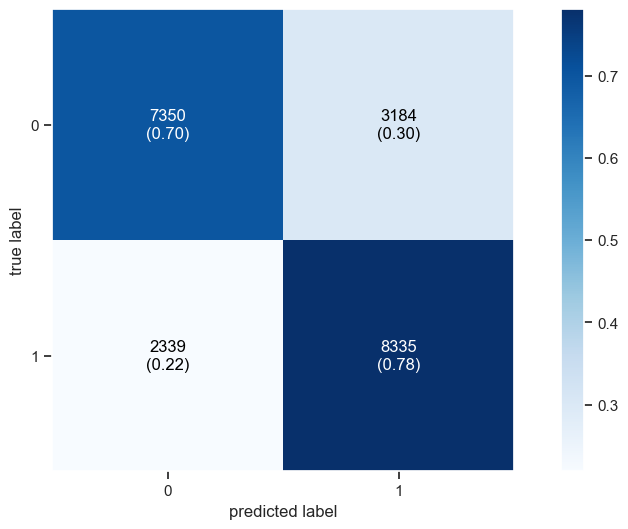

In [37]:
rf = RandomForestClassifier(max_depth = 5,
                            n_estimators = 1000,
                            max_features = 'auto',
                            class_weight = 'balanced')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Score do conjunto de treinamento: {:.4f}'.format(rf.score(x_train, y_train)))
print('Score do conjunto de teste: {:.4f}'.format(rf.score(x_test, y_test)))

print(classification_report(y_test,y_pred))

graph = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = graph,
                      show_absolute = True,
                      show_normed = True,
                      colorbar = True)
plt.show()

Score do conjunto de treinamento: 0.7029
Score do conjunto de teste: 0.6970
              precision    recall  f1-score   support

           0       0.69      0.70      0.70     10534
           1       0.70      0.70      0.70     10674

    accuracy                           0.70     21208
   macro avg       0.70      0.70      0.70     21208
weighted avg       0.70      0.70      0.70     21208



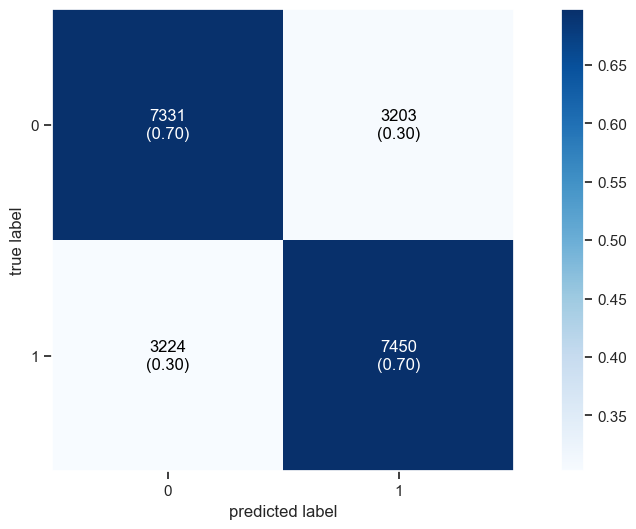

In [38]:
rf = ExtraTreeClassifier(max_depth = 5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Score do conjunto de treinamento: {:.4f}'.format(rf.score(x_train, y_train)))
print('Score do conjunto de teste: {:.4f}'.format(rf.score(x_test, y_test)))

print(classification_report(y_test,y_pred))

graph = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = graph,
                      show_absolute = True,
                      show_normed = True,
                      colorbar = True)
plt.show()

C:\Users\biabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\biabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score do conjunto de treinamento: 0.7433
Score do conjunto de teste: 0.7369
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10534
           1       0.73      0.76      0.74     10674

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



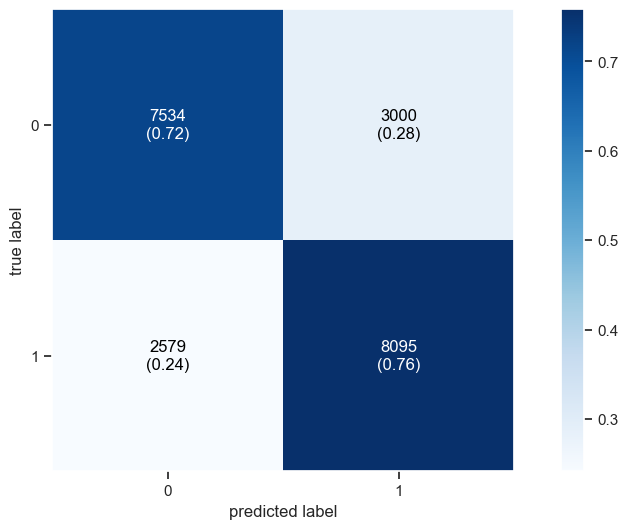

In [39]:
rf = LogisticRegression()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Score do conjunto de treinamento: {:.4f}'.format(rf.score(x_train, y_train)))
print('Score do conjunto de teste: {:.4f}'.format(rf.score(x_test, y_test)))

print(classification_report(y_test,y_pred))

graph = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = graph,
                      show_absolute = True,
                      show_normed = True,
                      colorbar = True)
plt.show()

Score do conjunto de treinamento: 0.7356
Score do conjunto de teste: 0.7270
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10534
           1       0.72      0.74      0.73     10674

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



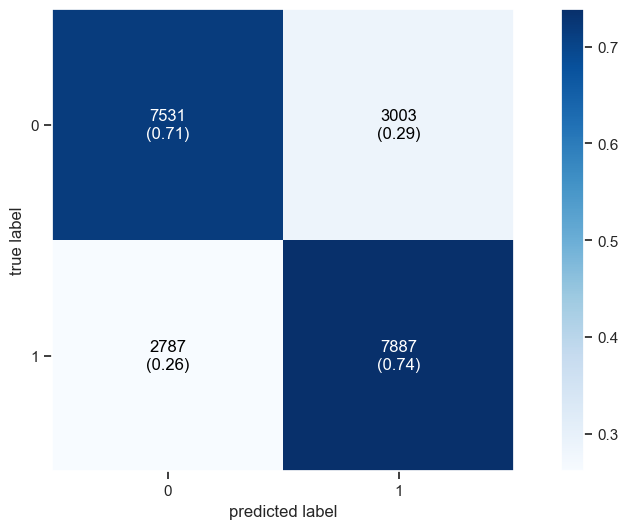

In [40]:
rf = DecisionTreeClassifier(max_depth = 5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Score do conjunto de treinamento: {:.4f}'.format(rf.score(x_train, y_train)))
print('Score do conjunto de teste: {:.4f}'.format(rf.score(x_test, y_test)))

print(classification_report(y_test,y_pred))

graph = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = graph,
                      show_absolute = True,
                      show_normed = True,
                      colorbar = True)
plt.show()